In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Terminology:**

> Add blockquote


1. SVG -> Scalable Vector Graphics
2. Cubic Beizer Curves
3. PNG -> Portable Network Graphics
4. Raster and vector images


**Importing packages**

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from skimage.draw import ellipse
from scipy.optimize import least_squares
from skimage.measure import regionprops, label


In [4]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Plot data

In [5]:

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = plt.cm.viridis(np.linspace(0, 1, len(paths_XYs)))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Fit a line to points

In [6]:

def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)
    return model.coef_[0], model.intercept_

# Detect straight lines

In [7]:

def detect_straight_lines(paths_XYs):
    for path in paths_XYs:
        for points in path:
            slope, intercept = fit_line(points)
            print(f"Detected line with slope: {slope}, intercept: {intercept}")

# Fit a circle to points

In [8]:

def fit_circle(points):
    def objective(params):
        xc, yc, r = params
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2) - r
            # Initial guess
    x_m = np.mean(points[:, 0])
    y_m = np.mean(points[:, 1])
    r_guess = np.mean(np.sqrt((points[:, 0] - x_m)**2 + (points[:, 1] - y_m)**2))
    initial_guess = [x_m, y_m, r_guess]

    result = least_squares(objective, initial_guess)
    xc, yc, r = result.x
    return xc, yc, r

# Detect circles

In [9]:

def detect_circles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            xc, yc, r = fit_circle(points)
            print(f"Detected circle with center: ({xc}, {yc}), radius: {r}")

# Fit an ellipse to points

In [10]:

def fit_ellipse(points):
    from skimage.draw import ellipse_perimeter
    from skimage.measure import EllipseModel

    x = points[:, 0]
    y = points[:, 1]

    if len(x) < 5:
        return None

    model = EllipseModel()
    model.estimate(np.column_stack((x, y)))
    xc, yc, a, b, theta = model.params

    return xc, yc, a, b, theta

# Detect ellipses

In [11]:

def detect_ellipses(paths_XYs):
    for path in paths_XYs:
        for points in path:
            result = fit_ellipse(points)
            if result:
                xc, yc, a, b, theta = result
                print(f"Detected ellipse with center: ({xc}, {yc}), axes: ({a}, {b}), angle: {theta}")

# Detect rectangles (approximation)

In [12]:

def detect_rectangles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 4:
                # Placeholder logic for detecting rectangles
                print("Detected potential rectangle")

# Detect regular polygons (approximation)

In [13]:

def detect_polygons(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 3:
                print("Detected potential polygon")

# Main

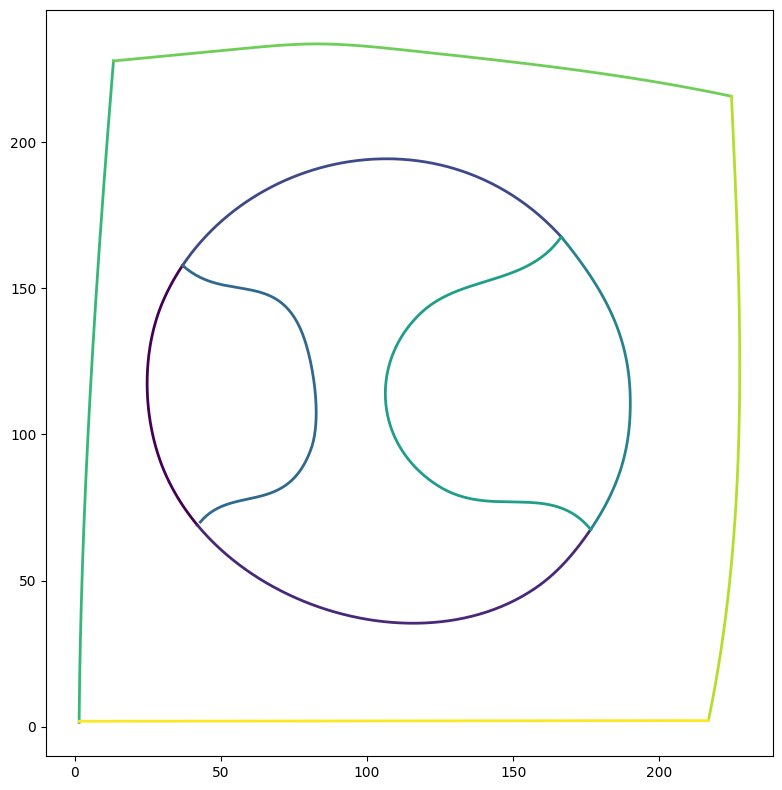

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

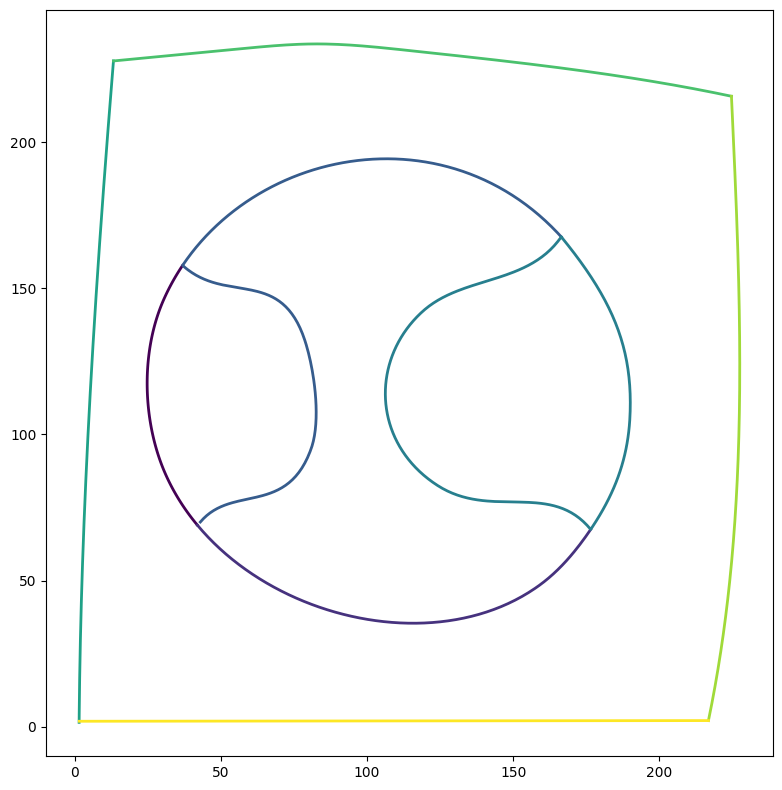

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.5330762643967643, intercept: 105.43508553124428
Detected line with slope: -0.013867949986169074, intercept: 116.94095392392113
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (113.40462798392849, 134.04588221427247), radius: 62.14445043500472
Detected circle with center: (151.3066766293715, 115.4028238990888), radius: 43.22225408262317
D

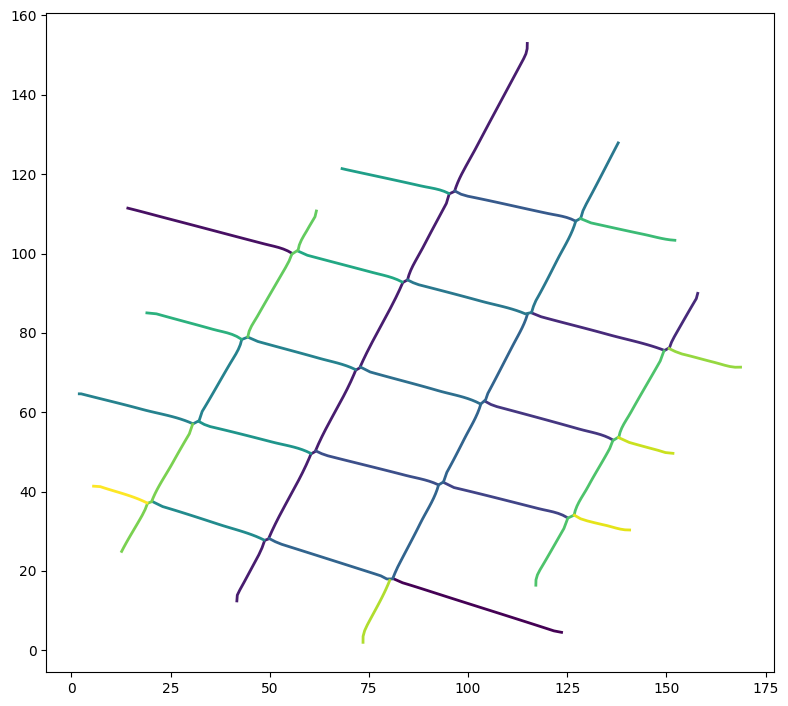

Detected line with slope: -0.3182967688764091, intercept: 43.63385042440776
Detected line with slope: -0.2651953239939962, intercept: 115.26947123052977
Detected line with slope: 1.875663211736688, intercept: -64.58066099892963
Detected line with slope: -0.0007851308096906168, intercept: 81.24351202276867
Detected line with slope: -0.2793781775507113, intercept: 91.50096097821606
Detected line with slope: -0.25759728818158817, intercept: 66.00563769382555
Detected line with slope: -0.25689801288869435, intercept: 65.71582293349982
Detected line with slope: -0.2244866173615266, intercept: 137.01879734349598
Detected line with slope: 1.0047894133042559, intercept: -45.50177821861604
Detected line with slope: -0.28119882317264455, intercept: 91.43157682770189
Detected line with slope: 0.6801959648395216, intercept: 20.91749588023636
Detected line with slope: 0.252079798540568, intercept: 58.50994183263729
Detected line with slope: -0.3252315112276888, intercept: 43.83725848251228
Detected

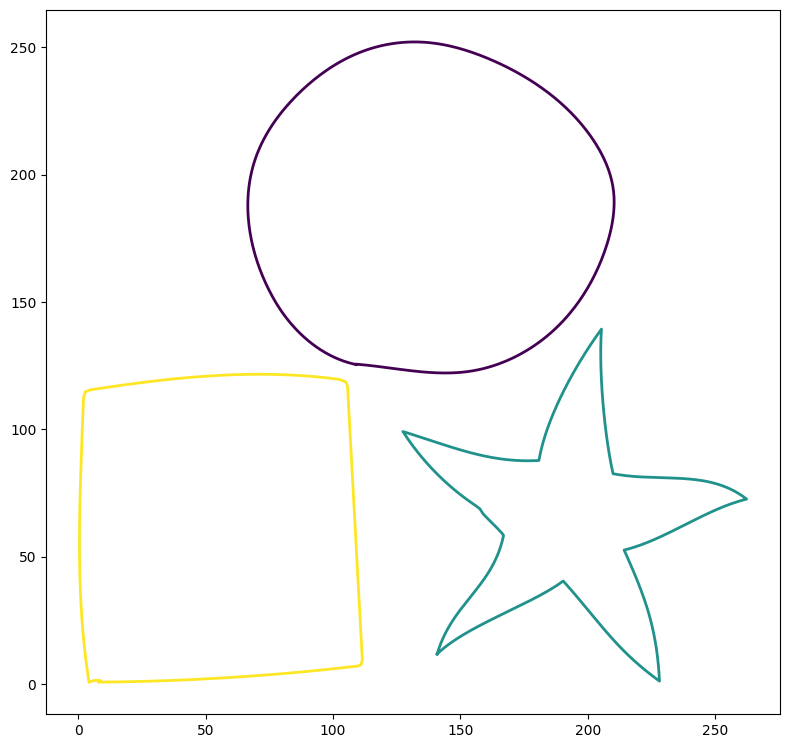

Detected line with slope: 0.0016507402994189679, intercept: 185.100205891781
Detected line with slope: 0.004913405303519038, intercept: 63.83109522726533
Detected line with slope: 0.023487372173239103, intercept: 58.38376140189103
Detected circle with center: (137.0885652762162, 185.92876585979351), radius: 68.13670281575855
Detected circle with center: (191.7290413792632, 65.51711218859928), radius: 48.34855109224873
Detected circle with center: (54.83038078264246, 60.55858771413001), radius: 63.724404864050506
Detected ellipse with center: (137.10475761937008, 185.90588150561743), axes: (71.48803524837459, 64.89259593223431), angle: 3.0924031435962607
Detected ellipse with center: (191.5947274716924, 65.59222110506687), axes: (51.315900275536286, 49.5059973563827), angle: 1.3910031646390861
Detected ellipse with center: (54.948117100295846, 60.26216802726115), axes: (67.04914127291514, 61.04630206481205), angle: 1.4849377055169806
Detected potential rectangle
Detected potential recta

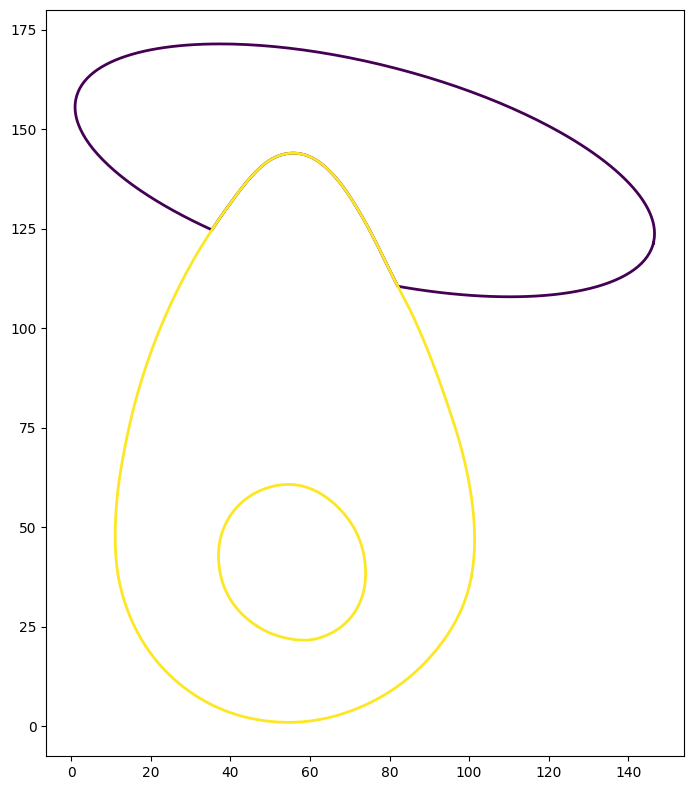

Detected line with slope: -0.2308369538851478, intercept: 158.22946480849745
Detected line with slope: -0.016386201043440757, intercept: 67.28365240816649
Detected line with slope: -0.08386672542964684, intercept: 45.74032071383246
Detected circle with center: (79.1470553291645, 143.44598322592992), radius: 50.366620190329805
Detected circle with center: (55.54669420450428, 65.89683405631312), radius: 55.89966125389623
Detected circle with center: (55.61096177329788, 41.1255857914838), radius: 18.963949292370767
Detected ellipse with center: (75.85096732374633, 140.63755529322123), axes: (71.60047859692963, 24.291709978583064), angle: 2.883478077964414
Detected ellipse with center: (55.6921621475173, 64.69460724268023), axes: (69.70640373253971, 43.51334808979301), angle: 1.5818183922984668
Detected ellipse with center: (55.60422140911297, 41.082464827785564), axes: (20.070074603470207, 17.898236874766315), angle: 2.1189817827519173
Detected potential rectangle
Detected potential recta

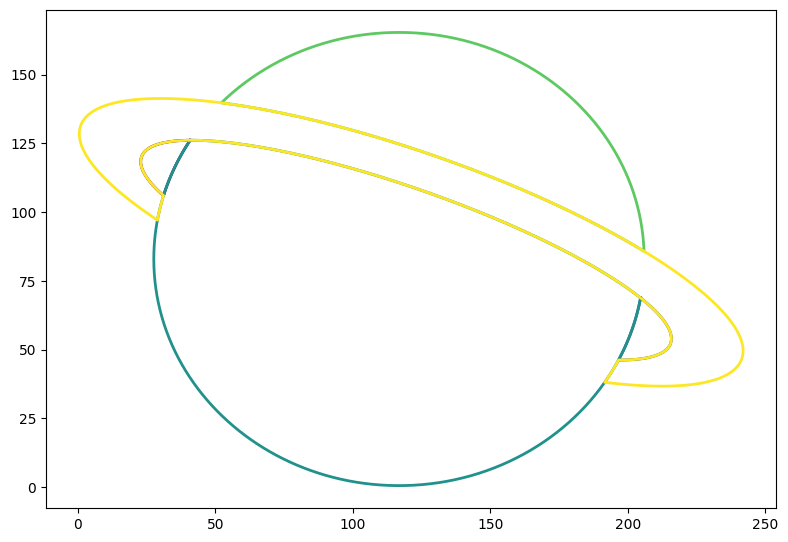

Detected line with slope: 0.2971383262443287, intercept: 109.0688042176644
Detected line with slope: 0.08574328033714176, intercept: 37.80223853958985
Detected line with slope: -0.14692473451934152, intercept: 77.57166897015175
Detected line with slope: -0.29099137807036934, intercept: 172.1666091532075
Detected line with slope: -0.34468029253121746, intercept: 142.55336930670194
Detected circle with center: (31.019630452855523, 118.09838340538478), radius: 8.229904608415168
Detected circle with center: (206.7657080881791, 55.58138700037767), radius: 9.263663303209974
Detected circle with center: (109.16216507350178, 63.2165229236624), radius: 72.9487436186136
Detected circle with center: (135.61974034742923, 128.55677972466202), radius: 50.59288453229489
Detected circle with center: (56.34438061439192, -90.90052294022836), radius: 219.38631144849253
Detected ellipse with center: (30.822759322332654, 118.02852292681861), axes: (10.284950542806342, 6.725547083312761), angle: 1.011845677

In [17]:

def main():
    csv_files=[
        '/content/frag0.csv',
        '/content/frag1.csv',
        '/content/frag2.csv',
        '/content/isolated.csv',
        '/content/occlusion1.csv',
        '/content/occlusion2.csv'
    ]
    for file_path in csv_files:

      path_XYs = read_csv(file_path)

      # Visualize the input data
      plot(path_XYs)

      # Detect different shapes
      detect_straight_lines(path_XYs)
      detect_circles(path_XYs)
      detect_ellipses(path_XYs)
      detect_rectangles(path_XYs)
      detect_polygons(path_XYs)

if __name__ == '__main__':
    main()

In [ ]:
dataframe=read_csv('/content/frag0.csv')

In [ ]:
dataframe

[[array([[ 41.94200134,  68.98000336],
         [ 41.25960541,  69.81170654],
         [ 40.58875275,  70.65237427],
         [ 39.92960739,  71.50195312],
         [ 39.28233719,  72.36040497],
         [ 38.6471138 ,  73.22766876],
         [ 38.02410889,  74.10371399],
         [ 37.4134903 ,  74.98847961],
         [ 36.81542969,  75.88191986],
         [ 36.23009109,  76.78398895],
         [ 35.65765381,  77.69464874],
         [ 35.09827805,  78.6138382 ],
         [ 34.55213928,  79.54151917],
         [ 34.01940155,  80.47764587],
         [ 33.50024414,  81.42215729],
         [ 32.99482727,  82.37502289],
         [ 32.50332642,  83.33618164],
         [ 32.02590561,  84.30560303],
         [ 31.56274223,  85.28321838],
         [ 31.11400032,  86.26899719],
         [ 30.73366356,  87.13911438],
         [ 30.36473846,  88.0182724 ],
         [ 30.00725937,  88.90615845],
         [ 29.6612606 ,  89.80249023],
         [ 29.3267765 ,  90.70696259],
         [ 29.00383949,  

In Python, __name__ is a special built-in variable that represents the name of the module currently being executed. When a Python file is run directly, __name__ is set to the string "__main__". If the file is being imported as a module in another file, then __name__ will be set to the module's name.